##Question 1:

To start with, we'll need to compute the number of rentals per station per day. Use pandas to do that.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import datetime
from pandas import DataFrame

In [2]:
stations = pd.read_table('stations.tsv')

In [3]:
usage = pd.read_table('usage_2012.tsv')

In [4]:
usage['time_start'] = pd.to_datetime(usage['time_start'])

In [5]:
usage_per_day = usage.set_index('time_start').groupby(pd.TimeGrouper('D')).size()

In [161]:
usage_per_station = usage[['station_start']].groupby('station_start').size()

In [10]:
usage_per_station_per_day = usage.groupby(['date', 'station_start']).size()

In [8]:
def to_date(x):
    return str(x.month) + '/' + str(x.day) + '/' + str(x.year)

In [9]:
usage['date'] = usage['time_start'].apply(to_date)

In [11]:
usage_per_station_per_day = usage.groupby(['date', 'station_start']).size()

In [38]:
usage_per_station_per_day

date      station_start                                   
1/1/2012  10th & Monroe St NE                                  10
          10th & U St NW                                       58
          10th St & Constitution Ave NW                        54
          11th & H St NE                                       20
          11th & Kenyon St NW                                  58
          12th & Army Navy Dr                                  12
          12th & Newton St NE                                   2
          13th & D St NE                                       46
          13th & H St NE                                       50
          13th St & New York Ave NW                            10
          14th & D St NW / Ronald Reagan Building              26
          14th & D St SE                                       32
          14th & G St NW                                       16
          14th & Harvard St NW                                 80
          14th & 

we have grouped our data by day then station and the size gives us the users in that day

2a. Our stations data has a huge number of quantitative attributes: fast_food, parking, restaurant, etc... Some of them are encoded as 0 or 1 (for absence or presence), others represent counts. To start with, run a simple linear regression where the input (x) variables are all the various station attributes and the output (y) variable is the average number of rentals per day.

In [12]:
rentals_per_station = usage[['station_start']].groupby('station_start').size()

In [13]:
def get_average(x):
    return x/366
daily_rentals = rentals_per_station.apply(get_average)

In [16]:
daily_rentals.head()

station_start
10th & E St NW                   17
10th & Monroe St NE              10
10th & U St NW                   71
10th St & Constitution Ave NW    55
11th & H St NE                   35
dtype: int64

In [14]:
from sklearn.linear_model import LinearRegression

In [162]:
c = DataFrame(rentals_per_station.index, columns=['station'])

In [163]:
c['rentals_per_station'] = rentals_per_station.values

In [164]:
c['station'] = rentals_per_station.index

In [165]:
merged = pd.merge(left=c, right=stations, left_on='station', right_on='station')

In [168]:
x = merged[list(merged.columns.values[8:])]

In [169]:
y = merged[list(merged.columns.values[1:2])]

In [170]:
model = LinearRegression()

In [171]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [133]:
import matplotlib.pyplot as plt

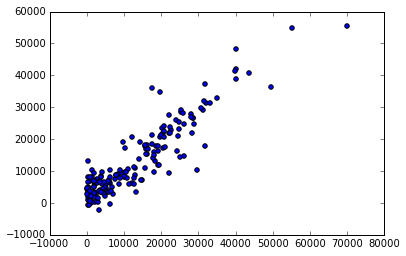

In [172]:
plt.scatter(y, model.predict(x))

ta da!  'simple' linear regression

###2b.  plot the predicted values against the acutal values and see how they compare
look up!

In [173]:
model.coef_

array([[  1.01084312e+03,  -3.10805349e+02,   1.20322039e+02,
         -2.18745236e+04,  -1.09440166e+03,  -1.83958512e+03,
          2.09113944e+03,   7.67588513e+02,   7.26435455e+01,
         -4.32151010e+16,   5.32890813e+02,   1.80058514e+04,
          2.05897909e+03,   7.27622946e+16,   1.32759608e+16,
          2.17533220e+03,   2.26991166e+16,   2.57175268e+03,
          5.23692330e+03,  -9.39484299e+02,   1.23710966e+03,
         -1.62350449e+04,   8.70735861e+03,  -1.57911379e+04,
         -4.51696483e+03,   2.26287583e+16,  -6.91731889e+02,
          1.54327694e+03,  -9.76249796e+02,   2.64290407e+03,
         -2.26287583e+16,   1.39884500e+03,   4.14669737e+02,
          3.88009212e+03,   1.64854105e+03,   6.77893353e+02,
         -1.35453527e+04,  -6.48731014e+03,   1.59515868e+03,
         -1.14515658e+03,   3.76796185e+03,   2.10295521e+02,
          5.46741794e+04,  -2.93701861e+03,  -4.23890245e+03,
          6.59036201e+04,  -5.29503449e+02,   6.48356574e+02,
        

###2c.  look at the model coefficients and see whether anything is odd
we think it's odd that some of these numbers are very large and some are very small

###2d.  go back and split the data between a training set and a test set

In [136]:
from sklearn.linear_model import Lasso

In [174]:
model = Lasso(alpha=0.15)

In [175]:
model.fit(x,y)

Lasso(alpha=0.15, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [176]:
model.coef_

array([  8.34975639e+02,  -1.02917966e+02,   2.04294252e+01,
        -2.30925050e+04,   6.87440187e+02,  -1.53824078e+03,
         1.99832353e+03,   7.14963787e+02,  -1.31622981e+02,
         0.00000000e+00,   9.22372074e+02,   2.52533959e+04,
         1.62282585e+03,   0.00000000e+00,   0.00000000e+00,
         1.87848540e+03,   0.00000000e+00,   1.63707313e+03,
         3.22465721e+03,  -1.11124813e+03,   1.17112068e+03,
        -1.33155630e+04,   1.02249079e+04,  -1.40049294e+04,
        -5.60558243e+03,   1.50296369e+04,   5.67863517e+02,
         1.10579349e+03,  -1.56908507e+03,   3.26087621e+03,
         2.74607801e+00,  -5.10714563e+01,   1.18148245e+03,
         4.74277193e+03,   1.75873063e+03,  -7.33039239e+02,
        -1.24722758e+04,  -6.04279905e+03,   1.91996057e+03,
         1.84948612e+03,   4.17060350e+03,  -2.07882442e+03,
         5.37552563e+04,  -1.92173266e+03,  -4.68050214e+03,
         6.57628420e+04,   4.00528301e+01,   1.81936722e+02,
        -2.45068087e+03,

In [177]:
from sklearn.cross_validation import train_test_split

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.50, random_state=42)

In [179]:
model = LinearRegression()

In [180]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

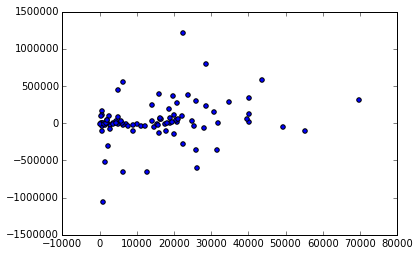

In [181]:
plt.scatter(y_test, model.predict(x_test))

In [225]:
model = Lasso(alpha=1000)

In [226]:
model.fit(x_train, y_train)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

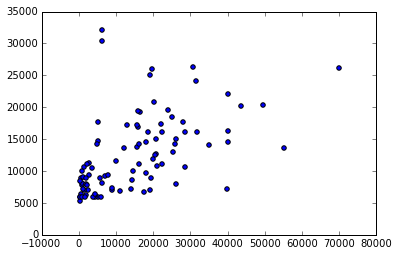

In [227]:
plt.scatter(y_test, model.predict(x_test))

In [193]:
model.get_params

<bound method Lasso.get_params of Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)>

In [228]:
coef = model.coef_

In [213]:
column_names = list(merged.columns.values[8:])

In [229]:
all_ammenities = zip(column_names, np.round(coef))

In [230]:
ammenities = []
for ammenity in all_ammenities:
    if ammenity[1] < -1 or ammenity[1] > 1:
        ammenities.append(ammenity)

In [231]:
ammenities

[('fast_food', -102.0),
 ('restaurant', 220.0),
 ('waste_basket', 275.0),
 ('bar', 338.0),
 ('place_of_worship', 480.0),
 ('traffic_signals', 57.0),
 ('crossing', 122.0),
 ('stop', -40.0),
 ('hotel', 916.0)]

list of ammenities that survive Lasso

In [234]:
model = LinearRegression()


In [238]:
x = x['crossing']

In [249]:
x = merged[list(merged.columns.values[-26:-25])]



In [250]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

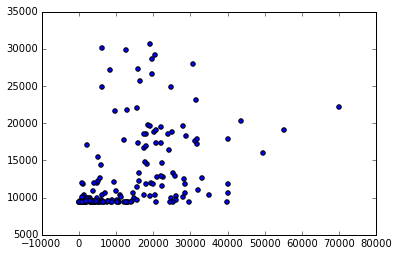

In [251]:
plt.scatter(y, model.predict(x))